# 6.12 Final Assignment: Advanced Algorithms Design 
Final Assignment for Classiq Certificate 2

# The Problem

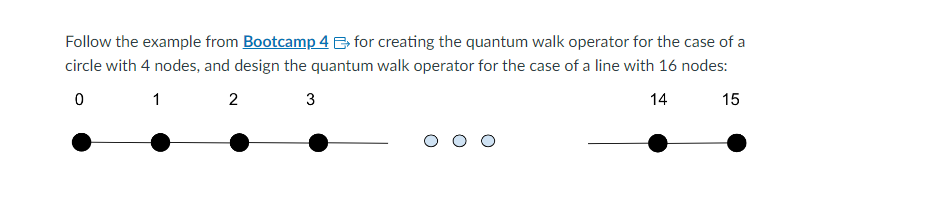

In [1]:
from IPython.display import Image
Image("Screenshot_4.png")

# The implementation

In [2]:
from classiq import *

size = 4  # size for 16 nodes

@qfunc
def prepare_minus(x: QBit):
    X(x)
    H(x)

@qfunc
def diffuzer_oracle(aux: Output[QNum], x: QNum):
    aux ^= (x != 0)

@qfunc
def zero_diffuzer(x: QNum):
    aux = QNum('aux')
    allocate(1, aux)
    within_apply(compute=lambda: prepare_minus(aux),
                 action=lambda: diffuzer_oracle)

def W_iteration(i: int, vertices: QNum, adjacent_vertices: QNum):
    prob = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0] 
    if i == 0:  # First node
        prob[1] = 1.0
    elif i == size**2 -1:  # Last node
        prob[size**2 -2] = 1.0
    else:
        prob[i + 1] = 0.5
        prob[i - 1] = 0.5
    print(f'State={i}, prob vec ={prob}')
    
    control(ctrl=vertices == i,
            operand=lambda: within_apply(
              compute=lambda: inplace_prepare_state(probabilities=prob, bound=0.01, target=adjacent_vertices),
              action=lambda: zero_diffuzer(adjacent_vertices)))

@qfunc
def W_operator(vertices: QNum, adjacent_vertices: QNum):
    for i in range(2**size):
        W_iteration(i, vertices, adjacent_vertices)

@qfunc
def edge_oracle(res: Output[QBit], vertices: QNum, adjacent_vertices: QNum):
    res |= ((vertices-adjacent_vertices == 1) | (vertices-adjacent_vertices ==  -1))
@qfunc
def bitwise_swap(x: QArray[QBit], y:QArray[QBit]):
    repeat(count= x.len,
    iteration= lambda i: SWAP(x[i],y[i]))

@qfunc
def S_operator(vertices: QNum, adjacent_vertices: QNum):
    res = QNum('res')
    edge_oracle(res, vertices, adjacent_vertices)
    control(ctrl=res == 1,
    operand=lambda: bitwise_swap(vertices, adjacent_vertices))

@qfunc
def main(vertices: Output[QNum], adjacent_vertices: Output[QNum]):
    allocate(size, vertices)
    hadamard_transform(vertices)
    allocate(size, adjacent_vertices)

    W_operator(vertices, adjacent_vertices)
    S_operator(vertices, adjacent_vertices)

qmod = create_model(main)
qprog = synthesize(qmod)
show(qprog)

State=0, prob vec =[0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
State=1, prob vec =[0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
State=2, prob vec =[0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
State=3, prob vec =[0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
State=4, prob vec =[0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
State=5, prob vec =[0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0]
State=6, prob vec =[0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0]
State=7, prob vec =[0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0]
State=8, prob vec =[0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0]
State=9, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0]
State=10, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0]
State=11, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0]
State=12, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0]
State=13, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0

# The circuit that is created from the Quantum programm
the circuit is quite big an dthe image turns quite blurry so we will break dow the circuit in each components

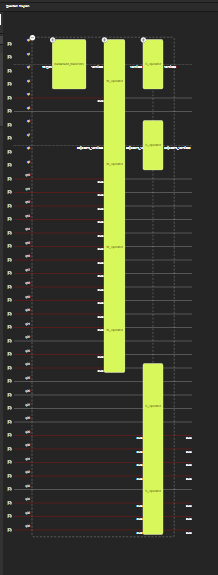

In [3]:
from IPython.display import Image
Image("Screenshot_1.png")

## The W(alk) operator
In short, the W_operator iterates over all possible states of the qubit system and applies a sequence of controlled quantum operations that define a quantum walk on a line. Each step of the walk is created by the transition probabilities to adjacent vertices.

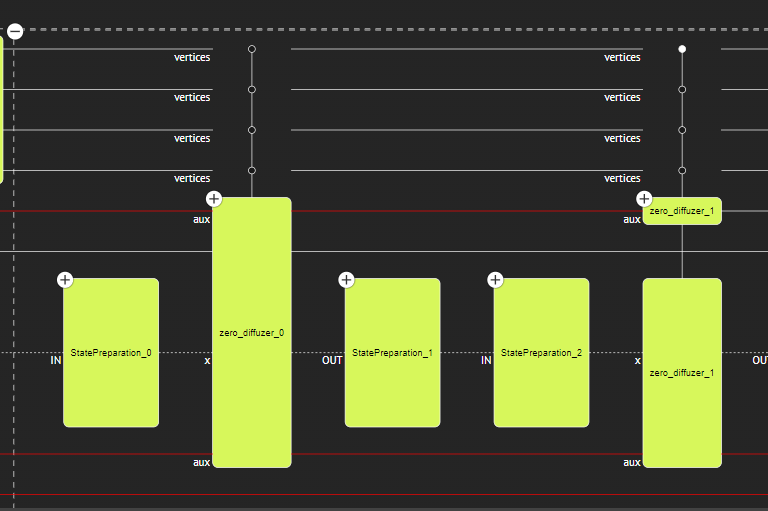

In [4]:
from IPython.display import Image
Image("Screenshot_2.png")

## The S(wap) operator
In short, the S_operator is used to swap states between connected nodes. The edge_oracle determines whether two nodes are connected by checking if an edge exists between them. If an edge exists, the bitwise_swap operation swaps the quantum states of the two nodes.

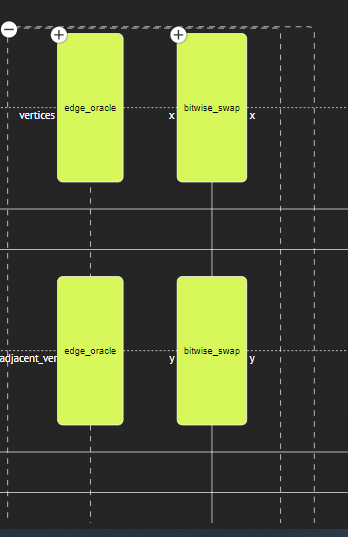

In [5]:
from IPython.display import Image
Image("Screenshot_3.png")